[*********************100%%**********************]  1 of 1 completed


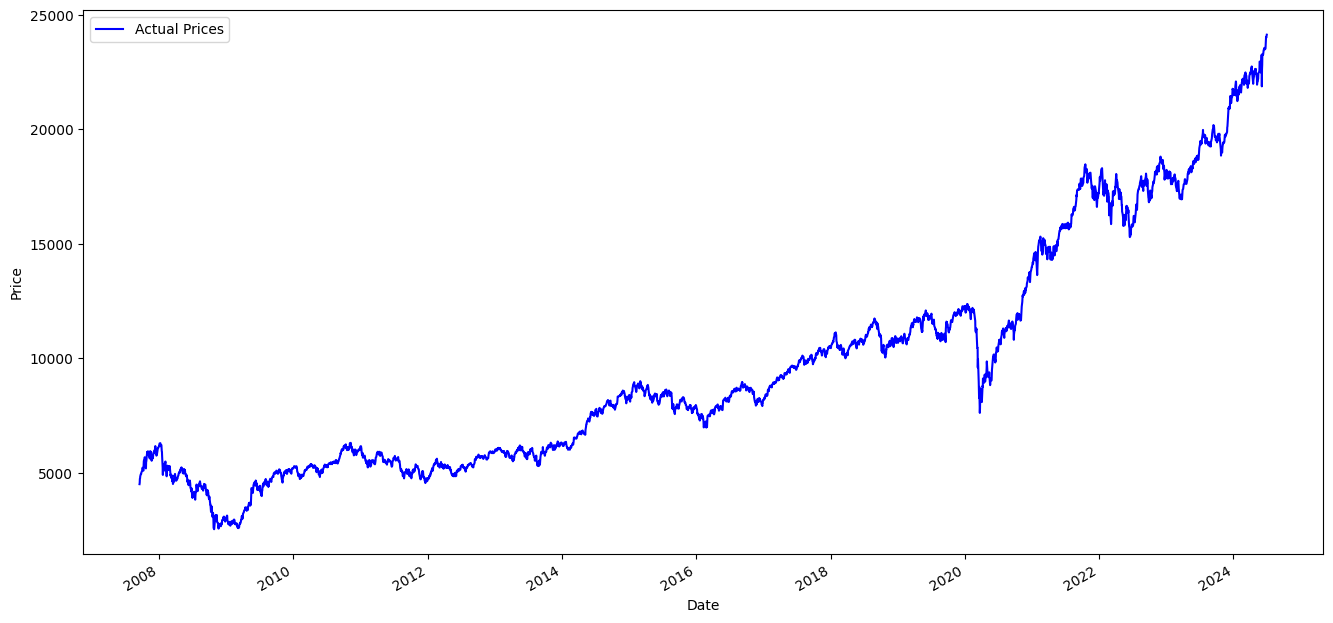

In [1]:


import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = '^NSEI'  
df = yf.download(ticker)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color='blue', label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [8]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=50)

[array([0.09114963, 0.09353426, 0.10214524, 0.10284835, 0.1070116 ,
       0.11138996, 0.11169757, 0.1117739 , 0.1145517 , 0.11551388,
       0.11771578, 0.1242775 , 0.12417805, 0.12312337, 0.11846285,
       0.12966429, 0.13494699, 0.13880493, 0.13433637, 0.14553781])]
[0.14542910154993377]

[array([0.09114963, 0.09353426, 0.10214524, 0.10284835, 0.1070116 ,
       0.11138996, 0.11169757, 0.1117739 , 0.1145517 , 0.11551388,
       0.11771578, 0.1242775 , 0.12417805, 0.12312337, 0.11846285,
       0.12966429, 0.13494699, 0.13880493, 0.13433637, 0.14553781]), array([0.09353426, 0.10214524, 0.10284835, 0.1070116 , 0.11138996,
       0.11169757, 0.1117739 , 0.1145517 , 0.11551388, 0.11771578,
       0.1242775 , 0.12417805, 0.12312337, 0.11846285, 0.12966429,
       0.13494699, 0.13880493, 0.13433637, 0.14553781, 0.1454291 ])]
[0.14542910154993377, 0.14039851308977885]

Epoch 1/50
389/389 [==============================] - 15s 20ms/step - loss: 0.0015
Epoch 2/50
389/389 [==================

In [9]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

122/122 [==============================] - 5s 13ms/step


0.9979918712121754

In [10]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

7/7 [==============================] - 0s 8ms/step


0.9615288234149473

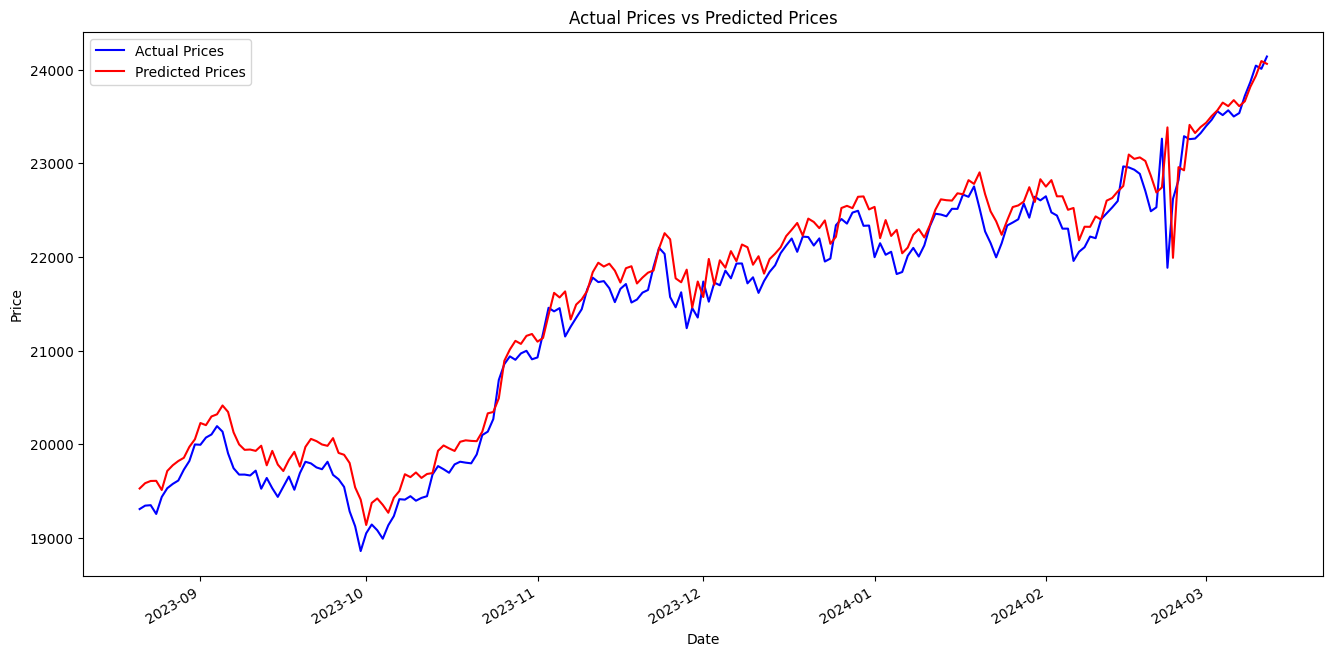

In [11]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [12]:
import joblib


model_file_path = 'nifty.joblib'
scaler_file_path = 'scaler_nifty.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to nifty.joblib
Scaler saved to scaler_nifty.joblib
